In [ ]:
pip install pycaret

In [ ]:
pip install shap

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from pycaret.regression import *

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/Ace Advisory/palm_ffb.csv')

In [4]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [ ]:
missing_values = df.isnull().any()
missing_columns = missing_values[missing_values].index.tolist()

print("Columns with missing values:")
for column in missing_columns:
    print(column)

Columns with missing values:


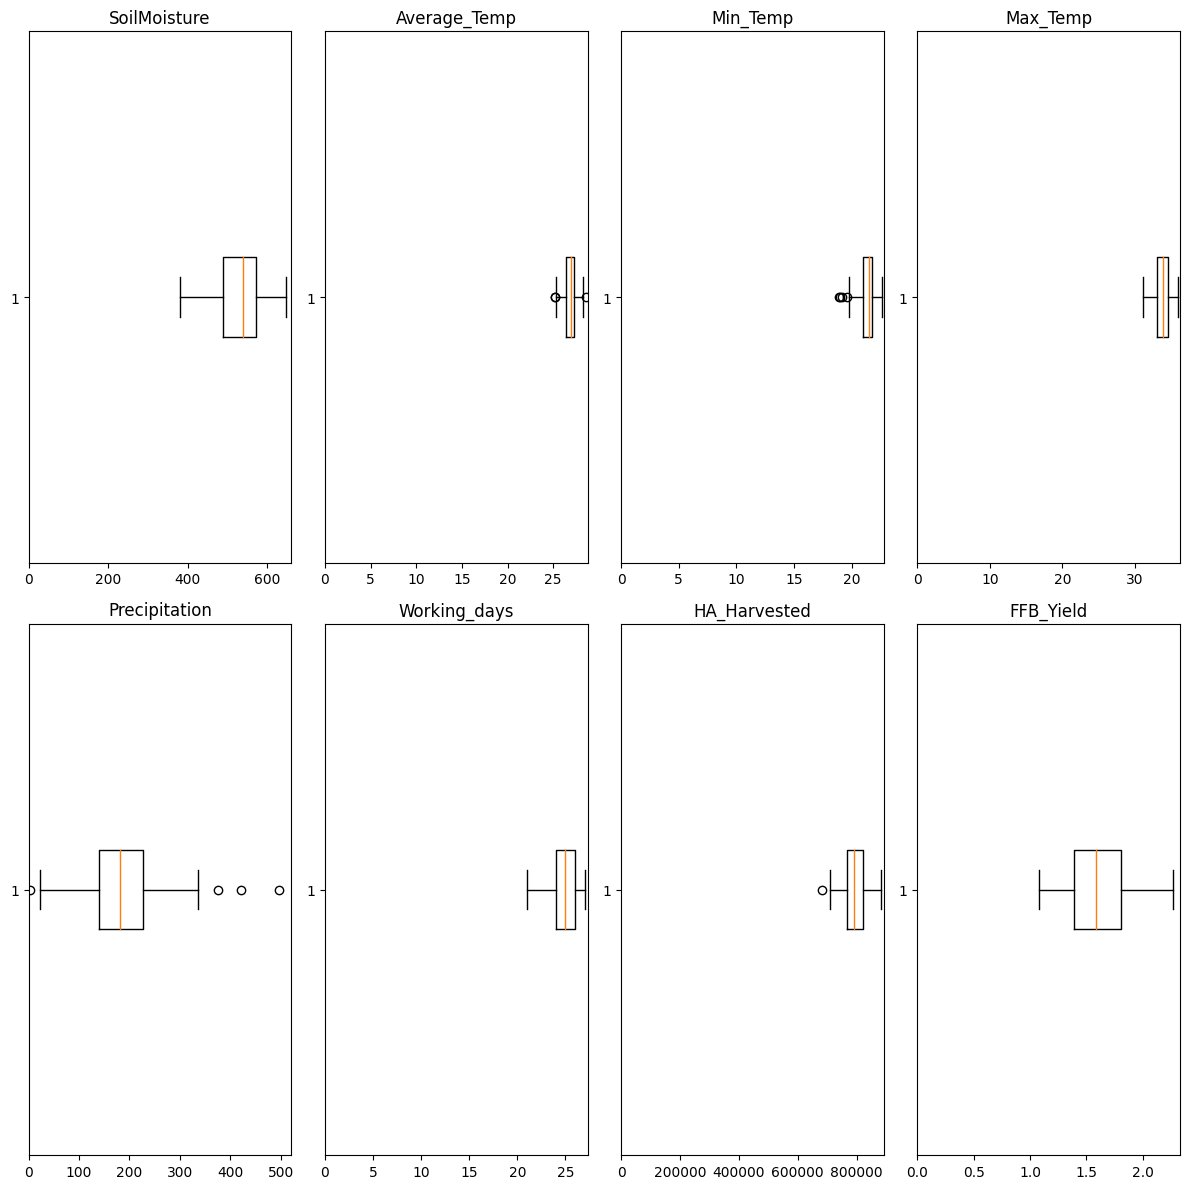

In [12]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'data'
# Exclude the 'date' column from the plot
columns_to_plot = [col for col in df.columns if col != 'Date']

# Calculate the number of rows and columns for subplots
num_plots = len(columns_to_plot)
num_cols = min(4, num_plots)
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots for box plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6*num_rows))

# Generate box plots for each feature
for i, col in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)
    ax.set_xlim(0)  # Set the lower x-axis limit to 0

# Remove empty subplots if the number of features is not a multiple of 3
if num_plots % num_cols != 0:
    for i in range(num_plots % num_cols, num_cols):
        fig.delaxes(axes[num_rows - 1, i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
df.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

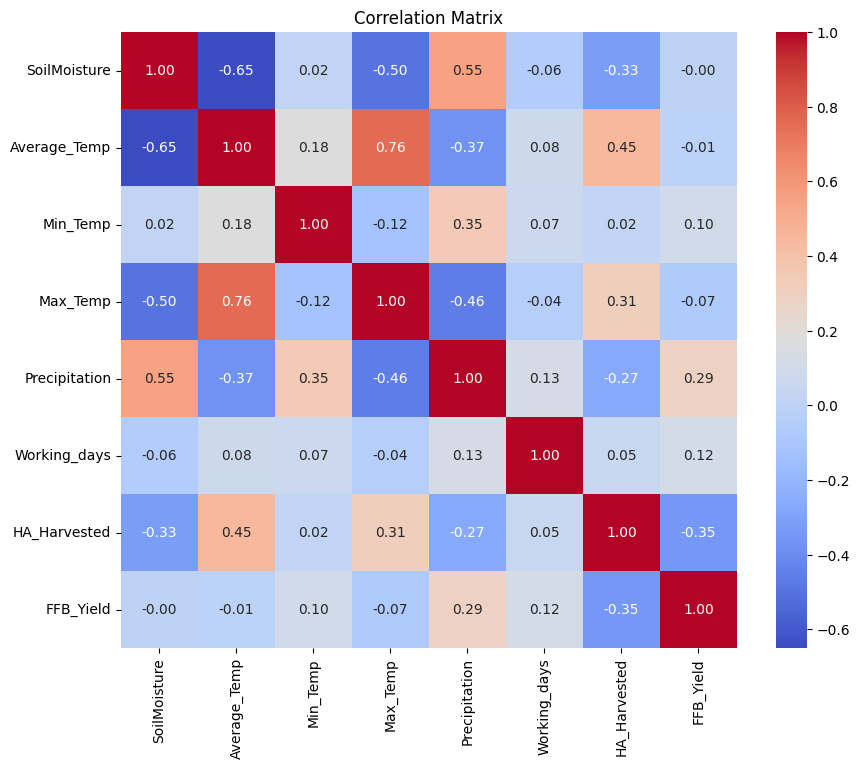

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for correlation analysis
columns_for_correlation = ['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield']  # Replace with the actual column names

# Create a new DataFrame with only the selected columns
data_for_correlation = df[columns_for_correlation]

# Perform correlation analysis
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Increase the figsize
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Add title and display the plot
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df['SoilMoisture_ma'] = df['SoilMoisture'].rolling(window=6, min_periods=1).mean()
df['Average_Temp_ma'] = df['Average_Temp'].rolling(window=6, min_periods=1).mean()
df['Precipitation_ma'] = df['Precipitation'].rolling(window=6, min_periods=1).mean()
df['Max_Temp_ma'] = df['Max_Temp'].rolling(window=6, min_periods=1).mean()
df['Min_Temp_ma'] = df['Min_Temp'].rolling(window=6, min_periods=1).mean()

In [ ]:
df['Max_min_Temp'] = df['Max_Temp'] / df['Min_Temp']
df['Max_min_Temp_ma'] = df['Max_min_Temp'].rolling(window=6, min_periods=1).mean()

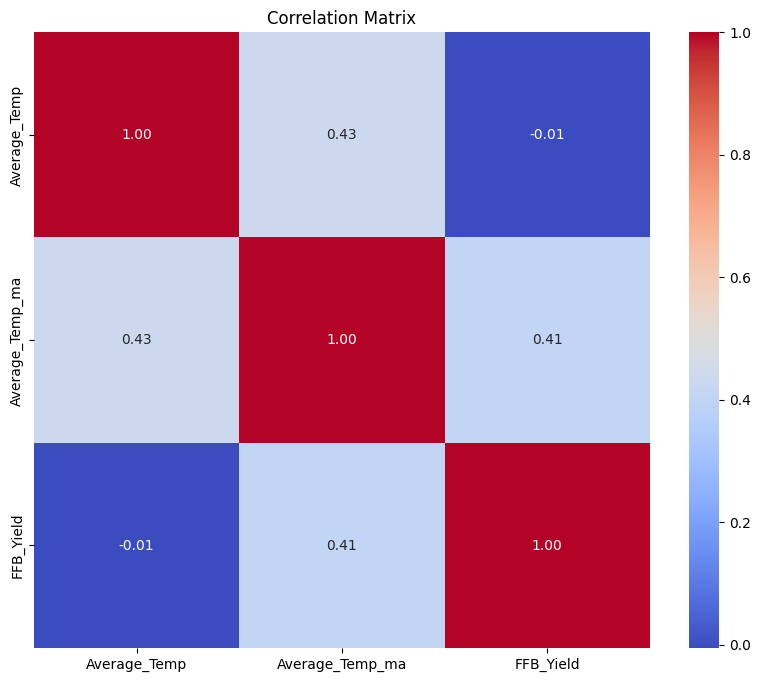

In [ ]:

# Select the columns for correlation analysis
columns_for_correlation = ['Average_Temp', 'Average_Temp_ma','FFB_Yield']  # Replace with the actual column names

# Create a new DataFrame with only the selected columns
data_for_correlation = df[columns_for_correlation]

# Perform correlation analysis
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Increase the figsize
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Add title and display the plot
plt.title("Correlation Matrix")
plt.show()

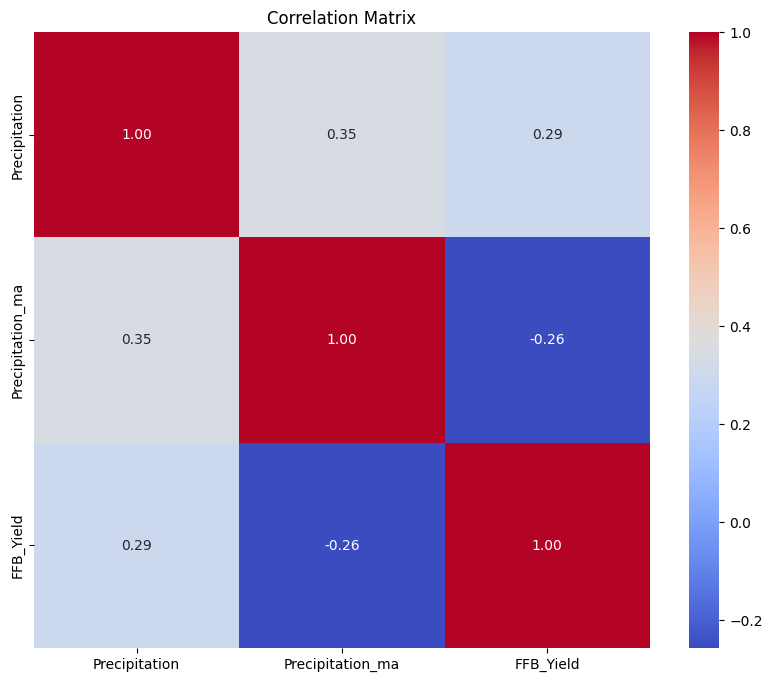

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['Precipitation', 'Precipitation_ma','FFB_Yield']  # Replace with the actual column names

# Create a new DataFrame with only the selected columns
data_for_correlation = df[columns_for_correlation]

# Perform correlation analysis
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Increase the figsize
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Add title and display the plot
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

In [ ]:
filtered_df = df.drop(df.index[:6]) #first six observation is has no moving average data
filtered_df.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield',
       'SoilMoisture_ma', 'Average_Temp_ma', 'Precipitation_ma', 'Max_Temp_ma',
       'Min_Temp_ma', 'Max_min_Temp', 'Max_min_Temp_ma'],
      dtype='object')

In [ ]:
filtered_df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,SoilMoisture_ma,Average_Temp_ma,Precipitation_ma,Max_Temp_ma,Min_Temp_ma,Max_min_Temp,Max_min_Temp_ma
6,01.07.2008,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66,558.366667,26.651887,186.400000,34.533333,21.050000,1.599057,1.640987
7,01.08.2008,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71,558.533333,26.824301,210.233333,34.433333,21.183333,1.589862,1.626060
8,01.09.2008,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62,557.550000,27.175681,192.883333,34.800000,21.166667,1.655660,1.644570
9,01.10.2008,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86,554.916667,27.251470,200.250000,34.650000,21.416667,1.533937,1.618673
10,01.11.2008,586.8,26.716667,22.3,34.7,272.6,25,761875.6614,1.89,561.816667,27.163925,222.250000,34.600000,21.650000,1.556054,1.598908


# Setup Expirement and Data Preprocessing

In [ ]:
from pycaret.regression import *
s = setup(filtered_df, target = 'FFB_Yield', session_id = 888,
          normalize = True, remove_outliers = True,
          ignore_features = ['Date'],
          train_size = 0.75, remove_multicollinearity = True,
          normalize_method = 'robust', feature_selection = True, n_features_to_select = 0.6)

,Description,Value
0,Session id,888
1,Target,FFB_Yield
2,Target type,Regression
3,Original data shape,"(124, 16)"
4,Transformed data shape,"(119, 9)"
5,Transformed train set shape,"(88, 9)"
6,Transformed test set shape,"(31, 9)"
7,Ignore features,1
8,Numeric features,14
9,Preprocess,True


# Model Training and Tuning

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1794,0.0519,0.2215,0.2354,0.0863,0.1195,0.3190
xgboost,Extreme Gradient Boosting,0.1764,0.0530,0.2196,0.2297,0.0860,0.1174,0.2640
rf,Random Forest Regressor,0.1831,0.0553,0.2257,0.1984,0.0879,0.1226,0.4000
ada,AdaBoost Regressor,0.1895,0.0566,0.2323,0.1655,0.0903,0.1263,0.2210
knn,K Neighbors Regressor,0.1776,0.0560,0.2306,0.1548,0.0901,0.1233,0.1950
gbr,Gradient Boosting Regressor,0.1912,0.0589,0.2346,0.1426,0.0911,0.1264,0.2670
lightgbm,Light Gradient Boosting Machine,0.1905,0.0579,0.2360,0.1167,0.0914,0.1253,0.2010
br,Bayesian Ridge,0.2035,0.0635,0.2475,0.0663,0.0952,0.1335,0.1920
huber,Huber Regressor,0.2063,0.0651,0.2486,0.0492,0.0951,0.1340,0.1910
ridge,Ridge Regression,0.2056,0.0647,0.2489,0.0485,0.0955,0.1346,0.1020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=888)

In [ ]:
xg = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1744,0.0577,0.2401,0.2393,0.0876,0.0971
1,0.0872,0.0140,0.1185,0.6783,0.0457,0.0564
2,0.2103,0.0535,0.2312,0.3345,0.0899,0.1325
3,0.2224,0.0758,0.2753,-0.1192,0.1121,0.1656
4,0.2445,0.1117,0.3343,-0.5081,0.1333,0.1823
5,0.1311,0.0258,0.1607,0.4316,0.0656,0.0812
6,0.2657,0.1018,0.3191,-0.3326,0.1276,0.1832
7,0.1582,0.0331,0.1819,0.4549,0.0731,0.1079
8,0.1476,0.0323,0.1797,0.3751,0.0706,0.0973


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

tuned_xg = tune_model(xg, custom_grid = param_grid,n_iter = 150, fold = 5, optimize= 'MAPE', choose_better = True, early_stopping = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1642,0.0467,0.2161,0.4393,0.0801,0.0966
1,0.1491,0.0318,0.1784,0.5665,0.0709,0.1016
2,0.1678,0.0532,0.2306,0.2092,0.0923,0.1171
3,0.2079,0.0546,0.2337,0.2081,0.0920,0.1376
4,0.1203,0.0344,0.1855,0.5317,0.0666,0.0690
Mean,0.1619,0.0442,0.2089,0.3910,0.0804,0.1044
Std,0.0284,0.0094,0.0229,0.1546,0.0106,0.0227


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [ ]:
xg = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1744,0.0577,0.2401,0.2393,0.0876,0.0971
1,0.0872,0.0140,0.1185,0.6783,0.0457,0.0564
2,0.2103,0.0535,0.2312,0.3345,0.0899,0.1325
3,0.2224,0.0758,0.2753,-0.1192,0.1121,0.1656
4,0.2445,0.1117,0.3343,-0.5081,0.1333,0.1823
5,0.1311,0.0258,0.1607,0.4316,0.0656,0.0812
6,0.2657,0.1018,0.3191,-0.3326,0.1276,0.1832
7,0.1582,0.0331,0.1819,0.4549,0.0731,0.1079
8,0.1476,0.0323,0.1797,0.3751,0.0706,0.0973


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [300],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6,0.7, 0.8],
}

tuned_xg = tune_model(xg, custom_grid = param_grid,n_iter = 150, fold = 5, optimize= 'RMSE', choose_better = True, early_stopping = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1462,0.0406,0.2015,0.5124,0.0743,0.0860
1,0.1689,0.0407,0.2017,0.4460,0.0799,0.1150
2,0.1829,0.0601,0.2452,0.1063,0.0972,0.1265
3,0.1989,0.0577,0.2402,0.1637,0.0952,0.1323
4,0.1205,0.0256,0.1599,0.6522,0.0579,0.0714
Mean,0.1635,0.0449,0.2097,0.3761,0.0809,0.1062
Std,0.0276,0.0127,0.0310,0.2086,0.0145,0.0236


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
pred_holdout = predict_model(tuned_xg)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.1537,0.0516,0.2271,0.4496,0.0876,0.1013


In [ ]:
tuned_xg

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=888, ...)

In [ ]:
pred_holdout

In [ ]:
save_model(tuned_xg, '/content/drive/MyDrive/Capstone Project/Ace Advisory/saved_tuned_xg_model_2023_07_10')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SoilMoisture', 'Average_Temp',
                                              'Min_Temp', 'Max_Temp',
                                              'Precipitation', 'Working_days',
                                              'HA_Harvested', 'SoilMoisture_ma',
                                              'Average_Temp_ma',
                                              'Precipitation_ma', 'Max_Temp_ma',
                                              'Min_Temp_ma', 'Max_min_Temp',
                                              'Max_min_Temp_ma'],
                                     transformer=SimpleImputer())),...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
               

In [ ]:
X_train_trans = get_config('X_train_transformed')
y_train_trans = get_config('y_train_transformed')
X = get_config('X')
y = get_config('y')
y_train = get_config('y_train')
X_train = get_config('X_train')
ori_data =  get_config('data')
X_test = get_config('X_test')

In [ ]:
get_config()

In [ ]:
save_experiment('/content/drive/MyDrive/Capstone Project/Ace Advisory/et_expriment_20230709')

In [ ]:
load_experiment('/content/drive/MyDrive/Capstone Project/Ace Advisory/et_expriment_20230709', data = filtered_df)

In [ ]:
# Get feature importances
importances = tuned_xg.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X_train_trans.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

            Feature  Importance
3      HA_Harvested    0.275275
4   Average_Temp_ma    0.210874
2     Precipitation    0.143120
6       Min_Temp_ma    0.114989
1      Average_Temp    0.086506
5  Precipitation_ma    0.067938
7   Max_min_Temp_ma    0.052902
0      SoilMoisture    0.048395


In [ ]:
X2 = X_test[X_train_trans.columns]

In [ ]:
X2.tail()

,SoilMoisture,Average_Temp,Precipitation,HA_Harvested,Average_Temp_ma,Precipitation_ma,Min_Temp_ma,Max_min_Temp_ma
17,474.899994,27.600000,103.099998,827699.3750,26.962061,141.116669,21.583334,1.570861
118,592.900024,26.530001,327.299988,760970.5000,27.039194,206.866669,21.350000,1.598693
83,619.400024,25.996775,374.899994,683431.9375,26.537043,239.149994,21.283333,1.562359
93,467.100006,27.735483,186.399994,748523.6875,27.181810,157.149994,21.216667,1.608298
91,481.500000,26.716129,257.799988,778257.8750,27.159391,153.283340,21.549999,1.575095


#***Interpret Model***

In [ ]:
import shap

tuned_xg2 = tuned_xg.fit(X2,pred_unseen.prediction_label)

In [ ]:
explainer = shap.TreeExplainer(tuned_xg2)


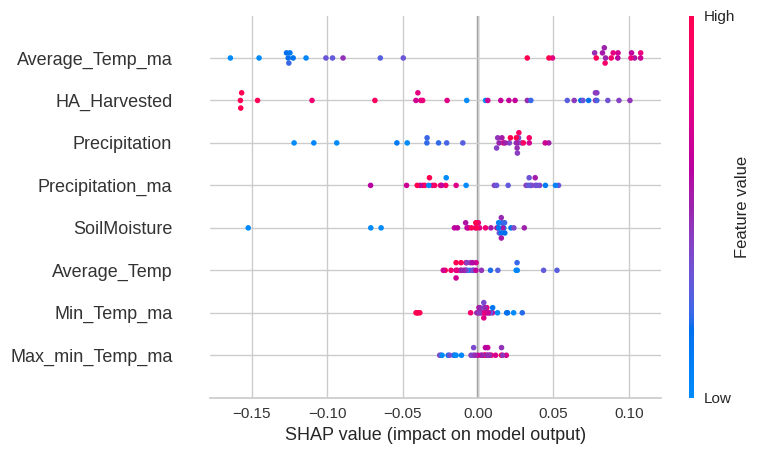

In [ ]:
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X2)

shap_values_2d = shap_values[0]  # Assuming you want to create a summary plot for the first instance
shap_values_2d = shap_values_2d.reshape(1, -1)  # Reshape to a 2D matrix

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X2)

In [ ]:
#Get shap values
explainer = shap.Explainer(tuned_xg2, X2)
shap_values = explainer(X2)

In [ ]:
len(shap_values)

31

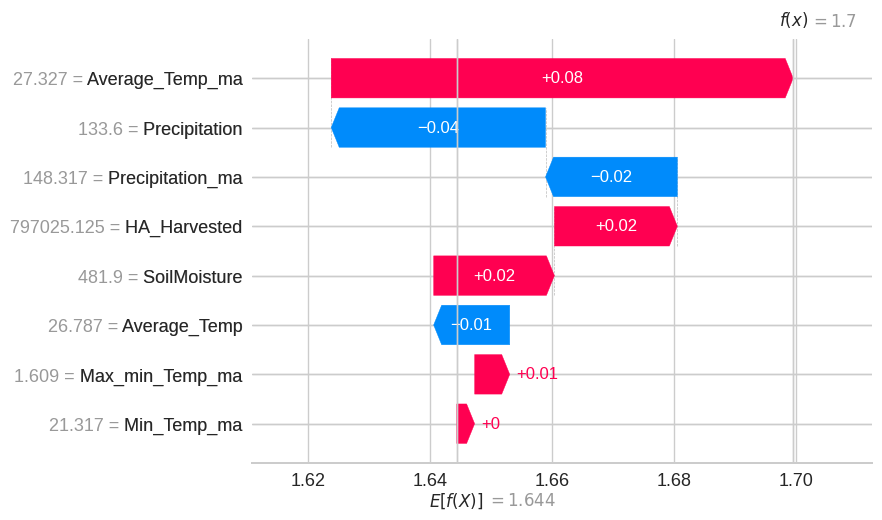

In [ ]:
shap.plots.waterfall(shap_values[23])


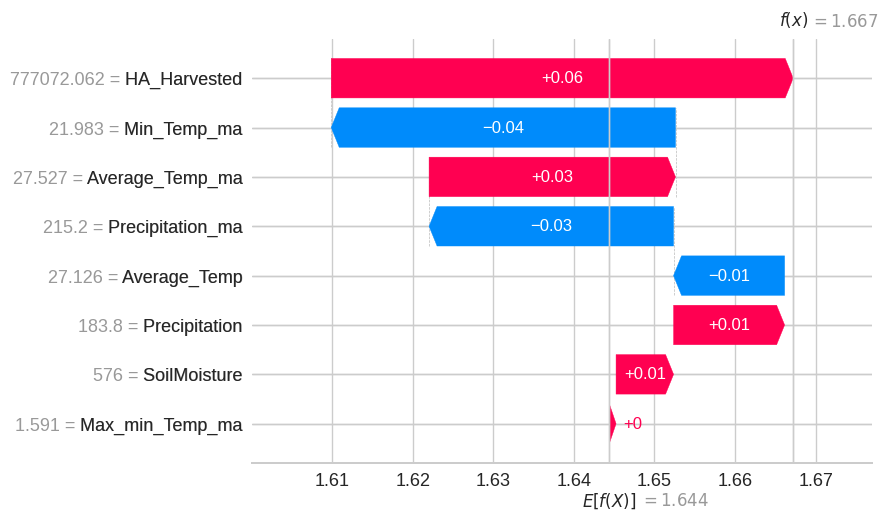

In [ ]:
shap.plots.waterfall(shap_values[8])